## Numpy

Libreria numero de Python que permite el procesado rapido de datos. Numpy tiene estructura de datos (arreglos) propias que son mas eficientes para almacenar la data.  
Mas eficientes que trabajar con listas simples de Python.  
A parte tiene sub librerias o derivadas numpy-financial, que tienen funciones de calculo financiero (TIR, NPER, NPV).  
Es la base de Pandas

https://numpy.org/numpy-financial/latest/

## Arreglos y Vectores

In [1]:
import numpy as np

In [7]:
flujos = [-200,100,200,50,30,200] # lista de python
#vector es un arreglo de 1 dimension
np_flujos = np.array(flujos)

print(flujos) #imprimir la lista de python
print(np_flujos) # imprimir el vector/arreglo de numpy (proveniente de la lista flujos)

type(np_flujos)
#type(flujos)

[-200, 100, 200, 50, 30, 200]
[-200  100  200   50   30  200]


numpy.ndarray

In [11]:
import numpy_financial as npf

In [13]:
npf.npv(0.08, np_flujos)

261.9195036946019

In [15]:
lista = ['APPL',135,'Apple','Cupertino, CA', 3500] # lista de python
print(lista)

['APPL', 135, 'Apple', 'Cupertino, CA', 3500]


In [16]:
np_lista = np.array(lista)
print(np_lista)

['APPL' '135' 'Apple' 'Cupertino, CA' '3500']


In [17]:
np_lista

array(['APPL', '135', 'Apple', 'Cupertino, CA', '3500'], dtype='<U13')

## Indexado / Slicing

similar a las listas normales

In [25]:
np_flujos = np.array([-200,'100',230,50,30,250],dtype=int)
print(np_flujos)
print(np_flujos[0])
print(np_flujos[2])
print(np_flujos[-1])
print(np_flujos[2:4])
print(np_flujos[:5])
print(np_flujos[2:])

[-200  100  230   50   30  250]
-200
230
250
[230  50]
[-200  100  230   50   30]
[230  50  30 250]


## Operaciones vectorizadas con Arreglos Numpy

In [29]:
cf = np.array([-200,100,230,50,30,250])
flujos = [-200,100,230,50,30,250]

In [32]:
#RESTA
print(cf -20)
# flujos-20 ## no se puede hacer con las listas de Python

[-220   80  210   30   10  230]


In [35]:
## para lograr el mismo efecto con listas de Python
flujos_n = []
for flujo in flujos:
    flujos_n.append(flujo-20)
print(flujos_n)

[-220, 80, 210, 30, 10, 230]


In [36]:
# MULTIPLICACIÓN
print(cf * 2)

[-400  200  460  100   60  500]


In [54]:
## calcular el valor presente neto
np.set_printoptions(precision=2) # setear la precision de los decimales para la libreria que esta en ejecucion
flujo_caja = np.array([-200,100,230,50,30,250])
r = 0.08
n = np.array([0,1,2,3,4,5])
#n = np.array(range(len(flujo_caja)))

vp = flujo_caja/((1+r)**n)

print(vp)
vp_neto = sum(vp)
print(f'El valor presente neto es de: ${ vp_neto}')

[-200.     92.59  197.19   39.69   22.05  170.15]
El valor presente neto es de: $321.668828155343


In [55]:
npf.npv(r,flujo_caja)

321.668828155343

In [65]:
# suma de dos arreglos
ganancias_bruto = np.array([-200,100,230,50,30,250])
impuestos = np.array([0,10,30,3,3,12])

ganancias_neta = ganancias_bruto - impuestos
print(ganancias_neta)

print(ganancias_bruto + impuestos)
print(ganancias_bruto * impuestos)

print(ganancias_bruto / impuestos)
   

[-200   90  200   47   27  238]
[-200  110  260   53   33  262]
[   0 1000 6900  150   90 3000]
[ -inf 10.    7.67 16.67 10.   20.83]


<ipython-input-65-45fca47e4031>:11: RuntimeWarning: divide by zero encountered in true_divide
  print(ganancias_bruto / impuestos)


In [72]:
ganancias_bruto = np.array([[-200,100,230,50,30],
                            [-200,100,230,50,30]])

ganancias_bruto2 = np.array([[200,10,20,5,30],
                            [200,100,30,5,30]])

In [73]:
print(ganancias_bruto+ganancias_bruto2)

[[  0 110 250  55  60]
 [  0 200 260  55  60]]


# Cambiar Valores (mutar)

In [76]:
cf= np.array([-200,20,50,70,120,30])

ganancias_bruto = np.array([[-200,100,230,50,30],
                            [-200,100,230,50,30]])

cf[2] = 30
print(cf)

ganancias_bruto[0][1]=400
print(ganancias_bruto)

[-200   20   30   70  120   30]
[[-200  400  230   50   30]
 [-200  100  230   50   30]]


In [77]:
cf[1:]=999
print(cf)

[-200  999  999  999  999  999]


## Precaución al copiar arreglos de numpy

In [99]:
cf1 = np.array([100,20,50,70])
cf2 = cf1

In [100]:
## n cantidad de lineas de codigo mas adelante
cf1[1]=151
print(cf1)

[100 151  50  70]


In [101]:
## m cantidad de lineas de codigo mas adelante
print(cf2)

[100 151  50  70]


In [102]:
## USAR COPY()
cf1 = np.array([100,20,50,70])
cf2 = cf1.copy()
cf2[1]=991
cf1[1]=90

print(cf2)
print(cf1)

[100 991  50  70]
[100  90  50  70]


#### Especial cuidado con slicing

In [117]:
dividendos = np.array([100,10,20,50,30,25])
ultimos_3 =dividendos[-3:]
print(ultimos_3)

ultimos_3[:]=2
print(ultimos_3)

print(dividendos)

[50 30 25]
[2 2 2]
[100  10  20   2   2   2]


In [118]:
dividendos = np.array([100,10,20,50,30,25])
ultimos_3 = dividendos[-3:].copy()
print(ultimos_3)

ultimos_3[:]=2
print(ultimos_3)

print(dividendos)

[50 30 25]
[2 2 2]
[100  10  20  50  30  25]


## Metodos y atributos de arreglos numpy

In [111]:
import numpy as np
cf = np.array([-200,20,50,70,100,50])

#Maximo
print(max(cf))
print(cf.max())

#minimo 
print(cf.min())

#El indice con el valor mas alto del arreglo
print(cf.argmax())

#El indice con el valor mas bajo del arreglo
print(cf.argmin())

# la suma
sum(cf)
print(cf.sum())

#la suma acumulada
print(cf.cumsum())
print(cf)

100
100
-200
4
0
90
[-200 -180 -130  -60   40   90]
[-200   20   50   70  100   50]


Los flujos de caja neto por periodo son  [-200   20   50   70  100   50]
Los flujos de caja acumulado son  [-200 -180 -130  -60   40   90]


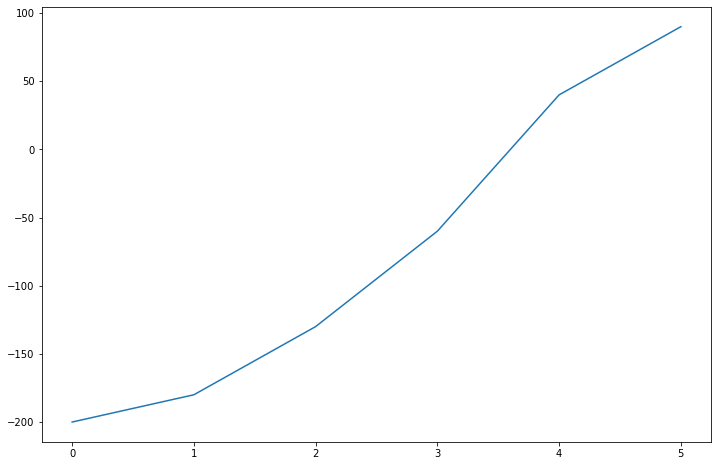

In [120]:
import matplotlib.pyplot as plt
import numpy as np
cf = np.array([-200,20,50,70,100,50])
cf_acum = cf.cumsum()
print('Los flujos de caja neto por periodo son ',cf)
print('Los flujos de caja acumulado son ',cf_acum)

plt.figure(figsize =(12,8))
plt.plot(cf_acum)
plt.show()

In [126]:
cf= np.array([80,30,100,25,1000])
cf.sort() ## IMPORTANTE: esto si modifica el arreglo original
print(cf)

[  25   30   80  100 1000]


In [127]:
cf2= cf+0.0125686868
cf2.round(4) # puedo pasarle como parametro la cantidad de digitios a la que debe redondear

array([  25.01,   30.01,   80.01,  100.01, 1000.01])

In [129]:
# La longitud o tamaño del arreglo
cf.size

5

In [130]:
import numpy as np
cf= np.array([9,4,64,25])

# raiz cuadrada de cada elemento del arreglo
print(np.sqrt(cf))

[3. 2. 8. 5.]


## Arreglos boolean y Filtrado condicional

In [131]:
import numpy as np
cf = np.array([-200.6,20.53,50,70.87,100,50])

In [132]:
print(cf<0)

[ True False False False False False]


In [134]:
print(cf[cf<0])
negativos = cf<0
print(cf[negativos])

[-200.6]
[-200.6]


In [135]:
positivos = cf[cf>0]
print(positivos)

[ 20.53  50.    70.87 100.    50.  ]


In [138]:
positivos[0]=-1
print(cf)
print(positivos)

[-200.6    20.53   50.     70.87  100.     50.  ]
[ -1.    50.    70.87 100.    50.  ]


##### En los Filtros se genera un arreglo distinto, como si hiciera .copy()  implicitamente